In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns

In [2]:
#Loading and Previewing the House Rent Dataset

data = pd.read_csv('./House_Rent_Dataset.csv')
data.head()

,size,price
0,2000,810
1,2100,907
2,1100,312
3,2200,950
4,1000,301


In [3]:
#Exploring the Dimensions of the House Rent Dataset
data.shape

(7, 2)

In [4]:
X = data['size'].values
Y = data['price'].values

In [5]:
#Calculating Mean Values for Variables X and Y

mean_X = np.mean(X)
mean_Y = np.mean(Y)

In [6]:
#Calculating Linear Regression Coefficients (m and c) Using Ordinary Least Squares Method

A = 0
B = 0
for i in range(len(X)):
  A += (X[i] - mean_X) * (Y[i] - mean_Y)
  B += (X[i] - mean_X) ** 2

m = A / B
c = mean_Y - (m * mean_X)

print(m, c)

0.5425615384615384 -272.8092307692307


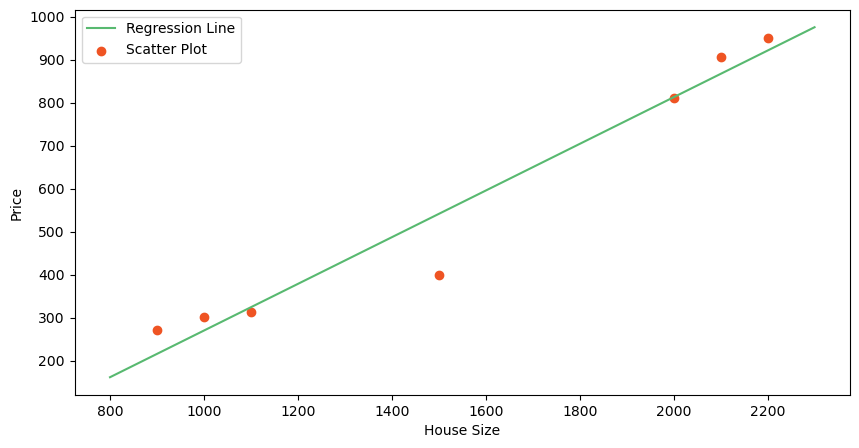

In [7]:
#Visualizing Linear Regression Fit on House Rent Dataset

plt.rcParams['figure.figsize'] = (10.0, 5.0)

max_x = np.max(X) + 100
min_x = np.min(X) - 100

x = np.linspace(min_x, max_x, 1000)
y = m * x + c

plt.plot(x, y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, c = "#ef5423", label = 'Scatter Plot')

plt.xlabel('House Size')
plt.ylabel('Price')
plt.legend()
plt.show()

### **Gradient Descent of Linear Regression**

-272.8019845744321 0.5425615384615384


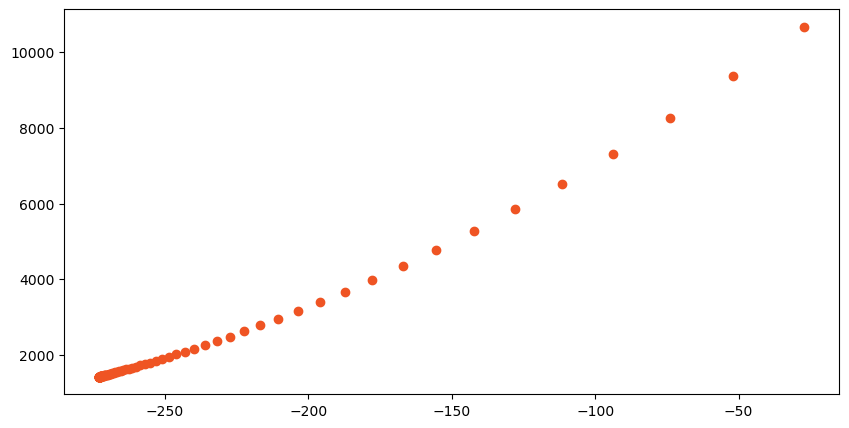

In [8]:
#Gradient Descent Optimization for Linear Regression Parameters (Thetas)

thetas = []
costs = []

m = len(X)
epoch = 100
# learning_rate_1 = 0.0000001
learning_rate = 0.1
theta_0 = 0
theta_1 = 0.5425615384615384

for i in range(epoch):
  temp_0 = 0
  temp_1 = 0
  for j in range(m):
    temp_0 += (theta_0 + theta_1*X[j] - Y[j])
    # temp_1 += (theta_0 + theta_1*X[j] - Y[j]) * X[j]
  
  theta_0 = theta_0 - learning_rate * (temp_0) / m
  # theta_1 = theta_1 - learning_rate_1 * (temp_1) / m

  thetas.append(theta_0)
  sum = 0
  for k in range(m):
    sum_ = (theta_0 + theta_1*X[k] - Y[k]) * ((theta_0 + theta_1*X[k] - Y[k]))
  cost = sum_ / (2 * m)
  costs.append(cost)

  # print('Theta 0 : ' , theta_0)
  # print('Theta 1 : ' ,theta_1)

print(theta_0, theta_1)

plt.scatter(thetas, costs, c = "#ef5423", label = 'Scatter Plot')
plt.show()

### **Gradient Descent with More House Rent Dataset**

In [9]:
data = pd.read_csv('./4K_House_Rent_Dataset.csv')
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [10]:
data.shape

(4746, 12)

-0.3998334298732945 40.60576103910427


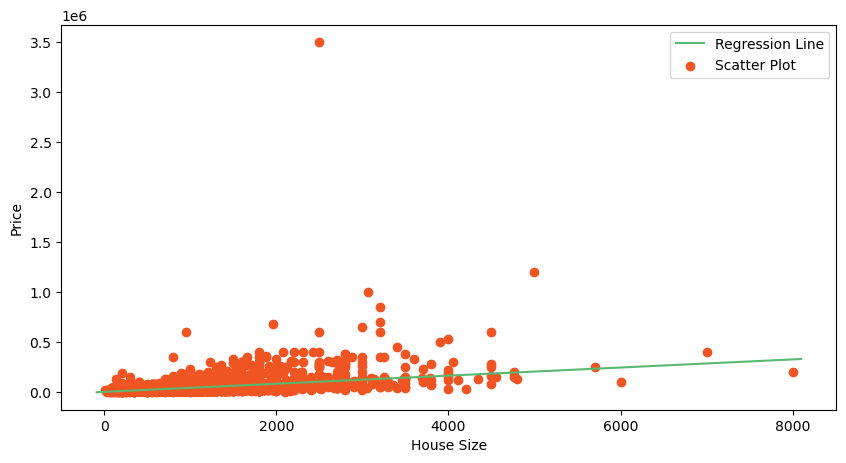

In [11]:
#Linear Regression with Gradient Descent on House Rent Dataset

X = data['Size']
Y = data['Rent']

m = len(X)
epoch = 1000
learning_rate = 0.0000001
theta_0 = 0
theta_1 = 0

for i in range(epoch):
  temp_0 = 0
  temp_1 = 0
  for j in range(m):
    temp_0 += (theta_0 + theta_1*X[j] - Y[j])
    temp_1 += (theta_0 + theta_1*X[j] - Y[j]) * X[j]
  
  theta_0 = theta_0 - learning_rate * (temp_0) / m
  theta_1 = theta_1 - learning_rate * (temp_1) / m

  sum = 0
  for k in range(m):
    sum_ = (theta_0 + theta_1*X[k] - Y[k]) * ((theta_0 + theta_1*X[k] - Y[k]))
  cost = sum_ / (2 * m)

  # print(theta_0, theta_1)


# Plotting Data
max_x = np.max(X) + 100
min_x = np.min(X) - 100

x = np.linspace(min_x, max_x, 1000)
y = theta_1 * x + theta_0

plt.plot(x, y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, c = "#ef5423", label = 'Scatter Plot')

print(theta_0, theta_1)

plt.xlabel('House Size')
plt.ylabel('Price')
plt.legend()
plt.show()

#### Gradient Descent Contour Plot

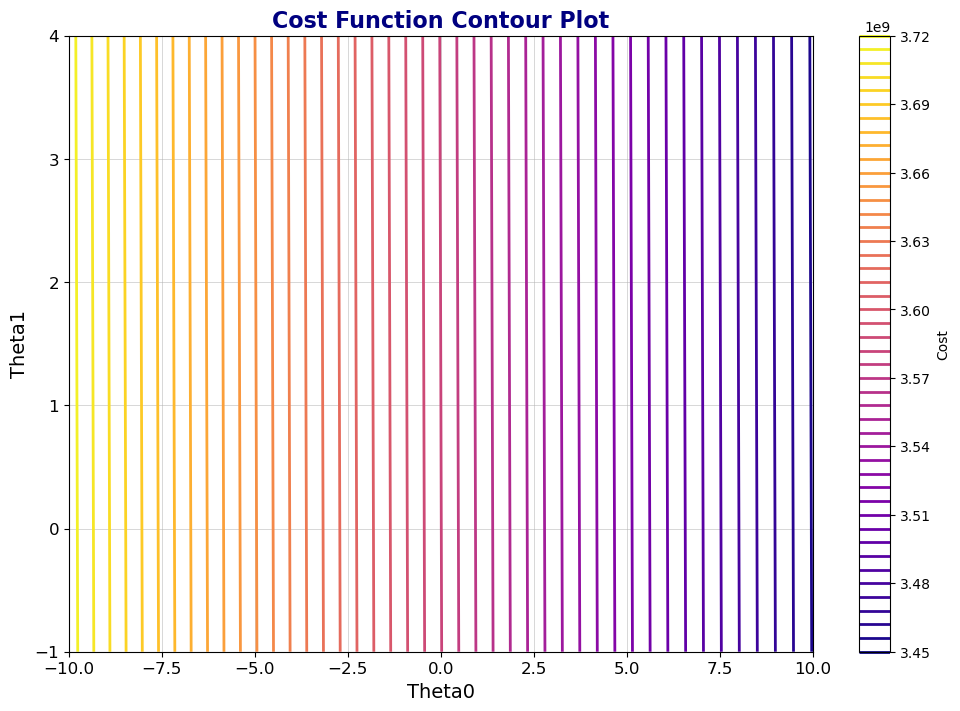

In [12]:
import numpy as np

theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        t = np.array([theta0, theta1])
        J_vals[i, j] = 1 / (2 * m) * np.sum((theta0 + theta1 * X - Y) ** 2)

fig, ax = plt.subplots(figsize=(12, 8))
contour = ax.contour(theta0_vals, theta1_vals, J_vals, levels=50, cmap="plasma", linewidths=2)
ax.set_xlabel("Theta0", fontsize=14)
ax.set_ylabel("Theta1", fontsize=14)
ax.set_title("Cost Function Contour Plot", fontsize=16, fontweight='bold', color='navy')
plt.colorbar(contour, ax=ax, label="Cost", orientation="vertical", pad=0.05)
ax.grid(True, linestyle='-', linewidth=0.5, alpha=0.7)
ax.tick_params(axis='both', labelsize=12)
plt.show()

#### Plot Gradient Descent Cost Values and Contour Plot

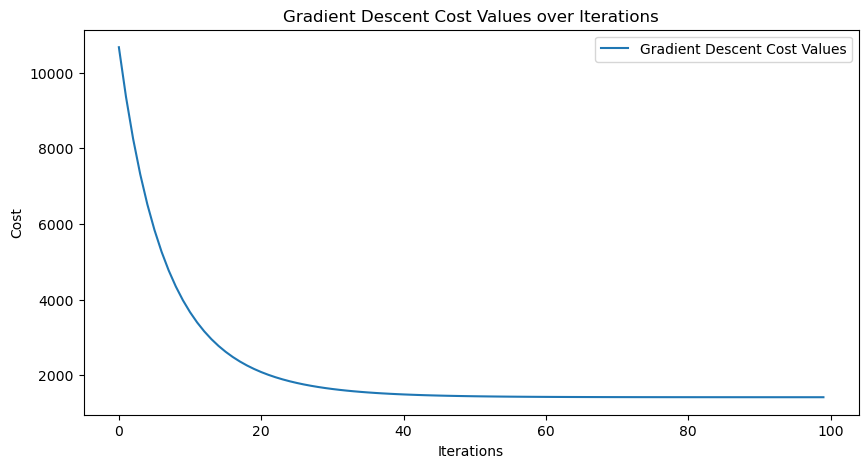

In [13]:
plt.plot(costs, label='Gradient Descent Cost Values')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent Cost Values over Iterations')
plt.legend()
plt.show()

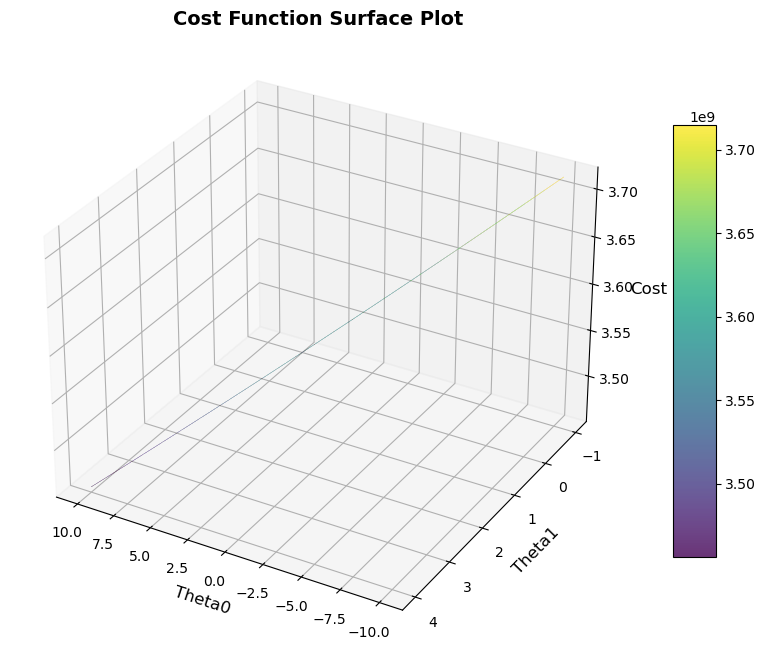

In [14]:
# 3D Surface Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap="viridis", edgecolor="none", alpha=0.8)
ax.set_xlabel("Theta0", fontsize=12)
ax.set_ylabel("Theta1", fontsize=12)
ax.set_zlabel("Cost", fontsize=12)
ax.view_init(30, 120)
ax.set_title("Cost Function Surface Plot", fontsize=14, fontweight='bold')
fig.colorbar(surf, ax=ax, shrink=0.7, aspect=10)
plt.show()